In [1]:
import random

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Configuration

In [2]:
def pre_config():
    plt.rcParams.update({'font.size': 20})
    %matplotlib inline
    

In [3]:
pre_config()

### Loading dataset

In [4]:
def load_dataset():
    df_etf = pd.read_csv('dataset/ETFs.csv', index_col=False)
    df_mf = pd.read_csv('dataset/Mutual Funds.csv', index_col=False)

    return df_etf, df_mf

In [5]:
df_etf, df_mf = load_dataset()

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Functions and ETFs Visualization

In [6]:
def types(df):
    for c, t in zip(df, df.dtypes):
        if np.issubdtype(t, np.number):
            print("Num", c, t)
        else:
            print("Str", c, t)

In [7]:
types(df_etf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Str legal_type object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num price_earnings float64
Num price_book float64
Num price_sales float64
Num price_cashflow float64
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num rating_us_government float64
Num rating_aaa float64
Num rating_aa float64
Num rating_a float64
Num rating_bbb float64
Num rating_bb float64
Num rating_b float64
Num rating_below_b float64
Num rating_others float64
Num

In [8]:
def describe(df):
    print("DataFrame summary:")
    print(df.info())
    print()

    print("Columns summary:")
    for col in list(df):
        print(col)
        print(df[col].dropna().describe())
        print(df[col].dropna().value_counts())
        print()
  

In [9]:
describe(df_etf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Columns: 104 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(94), object(10)
memory usage: 1.9+ MB
None

Columns summary:
fund_name
count     2352
unique    2352
top       IBGS
freq         1
Name: fund_name, dtype: object
IBGS    1
HDG     1
FSZ     1
USRT    1
IBDM    1
       ..
SDIV    1
VPU     1
FLRT    1
GEM     1
DOGS    1
Name: fund_name, Length: 2352, dtype: int64

fund_extended_name
count                         2352
unique                        2340
top       iShares MSCI Kokusai ETF
freq                             2
Name: fund_extended_name, dtype: object
iShares MSCI Kokusai ETF                                       2
iShares S&P 100 ETF                                            2
iShares JPX-Nikkei 400 ETF                                     2
iShares $ Treasury Bd 7-10yr ETFUSD Dist                       2
SPDR Gold Shares                                 

count    2348.000000
mean        2.259919
std         4.405158
min         0.000000
25%         0.000000
50%         0.000000
75%         3.560000
max        99.370000
Name: communication_services, dtype: float64
0.00     1221
3.56       10
3.57        9
1.13        7
1.26        6
         ... 
12.11       1
4.58        1
9.53        1
1.39        1
1.71        1
Name: communication_services, Length: 634, dtype: int64

energy
count    2348.000000
mean        4.991648
std        13.748538
min         0.000000
25%         0.000000
50%         0.000000
75%         5.285000
max       100.000000
Name: energy, dtype: float64
0.00      1195
100.00      16
5.43         7
7.34         7
1.77         6
          ... 
4.58         1
10.80        1
0.81         1
0.31         1
21.88        1
Name: energy, Length: 764, dtype: int64

industrials
count    2348.000000
mean        7.816440
std        12.503796
min         0.000000
25%         0.000000
50%         3.780000
75%        12.185000
max    

-0.48    114
 0.71     81
-4.30     69
 1.34     51
 5.86     48
        ... 
-5.26      3
-1.29      1
-0.34      1
-0.14      1
 0.58      1
Name: category_alpha_5years, Length: 77, dtype: int64

fund_alpha_10years
count    2013.000000
mean       -0.098758
std         3.392425
min       -34.940000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.000000
Name: fund_alpha_10years, dtype: float64
 0.00     1284
-0.10        5
-0.42        4
-0.29        4
-0.53        3
          ... 
-3.86        1
 9.36        1
 13.35       1
 6.91        1
-2.50        1
Name: fund_alpha_10years, Length: 566, dtype: int64

category_alpha_10years
count    1131.000000
mean        0.948064
std         3.283847
min       -10.410000
25%        -0.340000
50%         0.150000
75%         2.040000
max        10.030000
Name: category_alpha_10years, dtype: float64
 0.15     114
-0.34      81
 2.04      69
-0.30      51
 5.19      48
 1.99      45
 0.13      41
-0.90      35
-1.12   

Name: category_mean_annual_return_10years, dtype: float64
 0.69    136
 0.88     93
 0.30     88
 0.64     81
 0.55     69
 0.67     56
 0.78     41
 0.83     36
 0.25     35
 1.12     34
 0.33     34
 0.22     32
 0.79     31
 0.59     30
 0.38     26
 0.80     25
 0.62     24
 0.42     23
 0.74     23
 0.73     22
-0.46     21
 0.76     21
 0.51     20
 0.24     19
-0.98     18
 0.75     15
 0.11     15
 0.32     15
 0.37     12
 0.58     11
 0.18      9
 0.44      7
 0.61      6
 0.36      3
Name: category_mean_annual_return_10years, dtype: int64

fund_r_squared_3years
count    2251.000000
mean       49.098125
std        36.536021
min         0.000000
25%         2.115000
50%        56.760000
75%        82.505000
max       100.000000
Name: fund_r_squared_3years, dtype: float64
0.00      462
100.00     22
99.99       9
99.98       9
99.72       7
         ... 
51.03       1
1.09        1
45.93       1
77.80       1
64.02       1
Name: fund_r_squared_3years, Length: 1529, dtype: int64

In [10]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

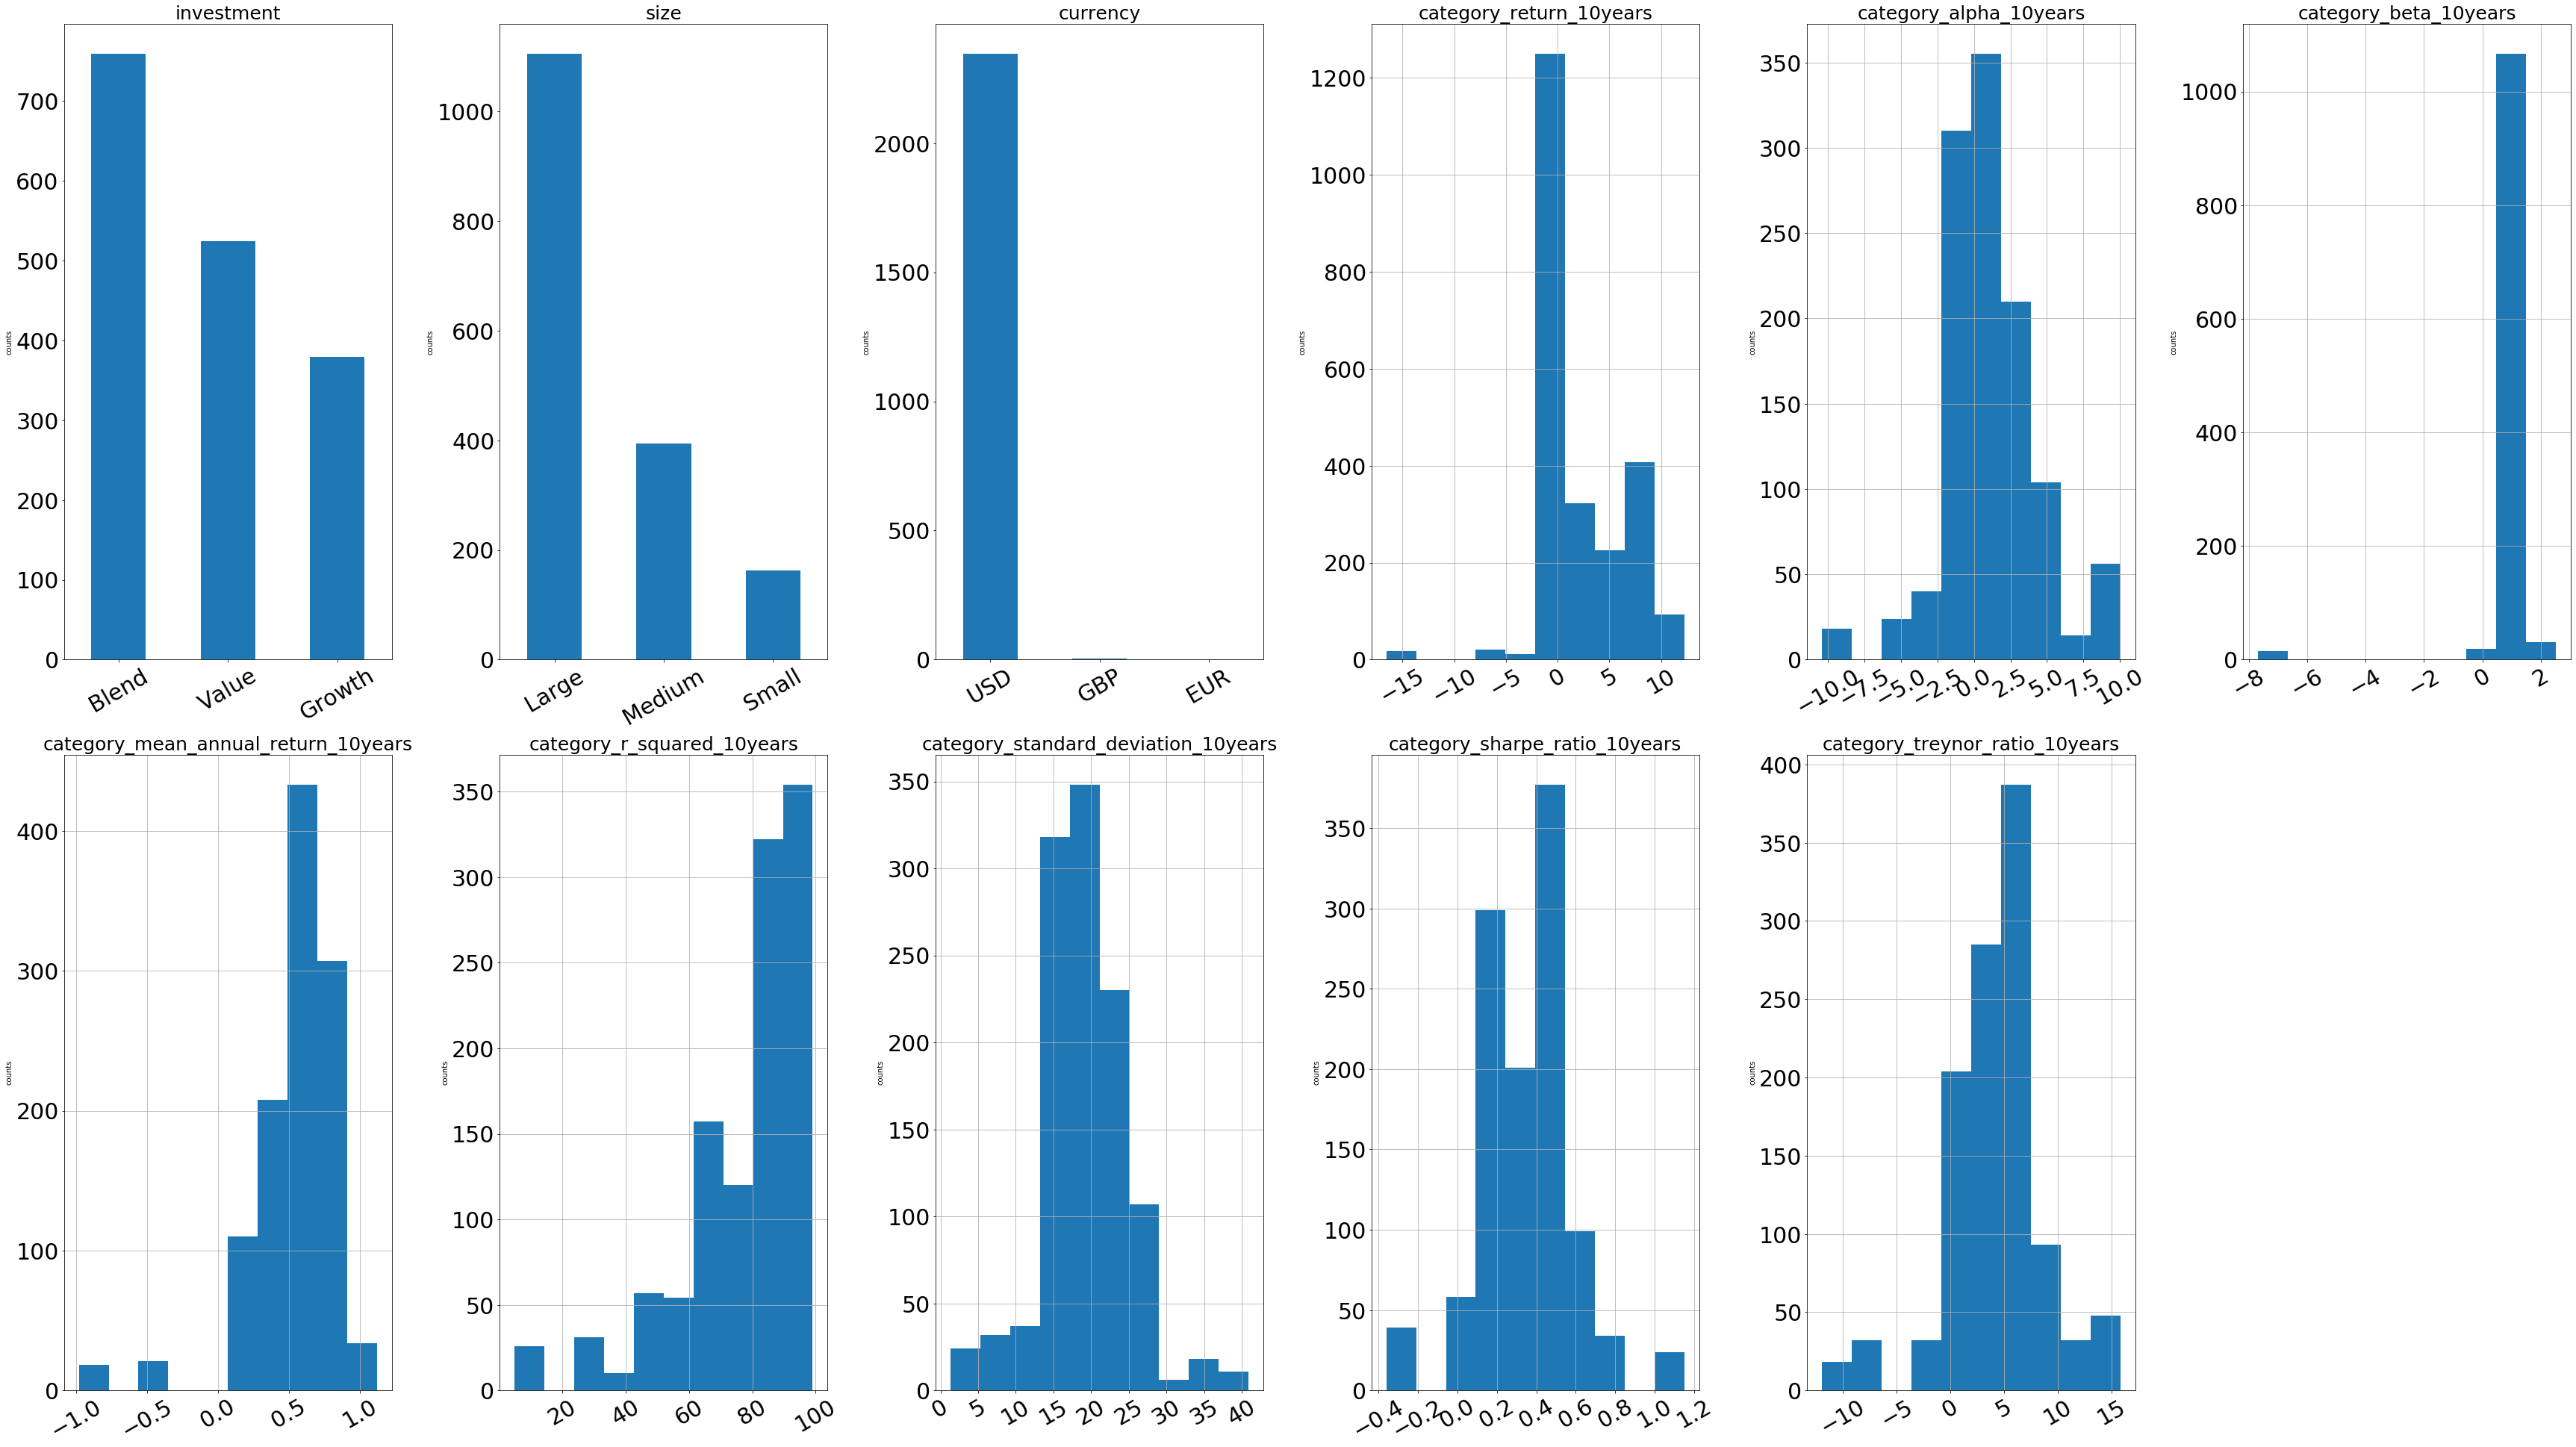

In [11]:
hist_bar_plot(df_etf)

In [12]:
def correlation_clean(df, threshold=(-0.9, -0.3, 0.3, 0.9)):
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [13]:
df_etf = correlation_clean(df_etf)

In [14]:
def corr_mtx(df, fig_size=50, unique=True):
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)
    

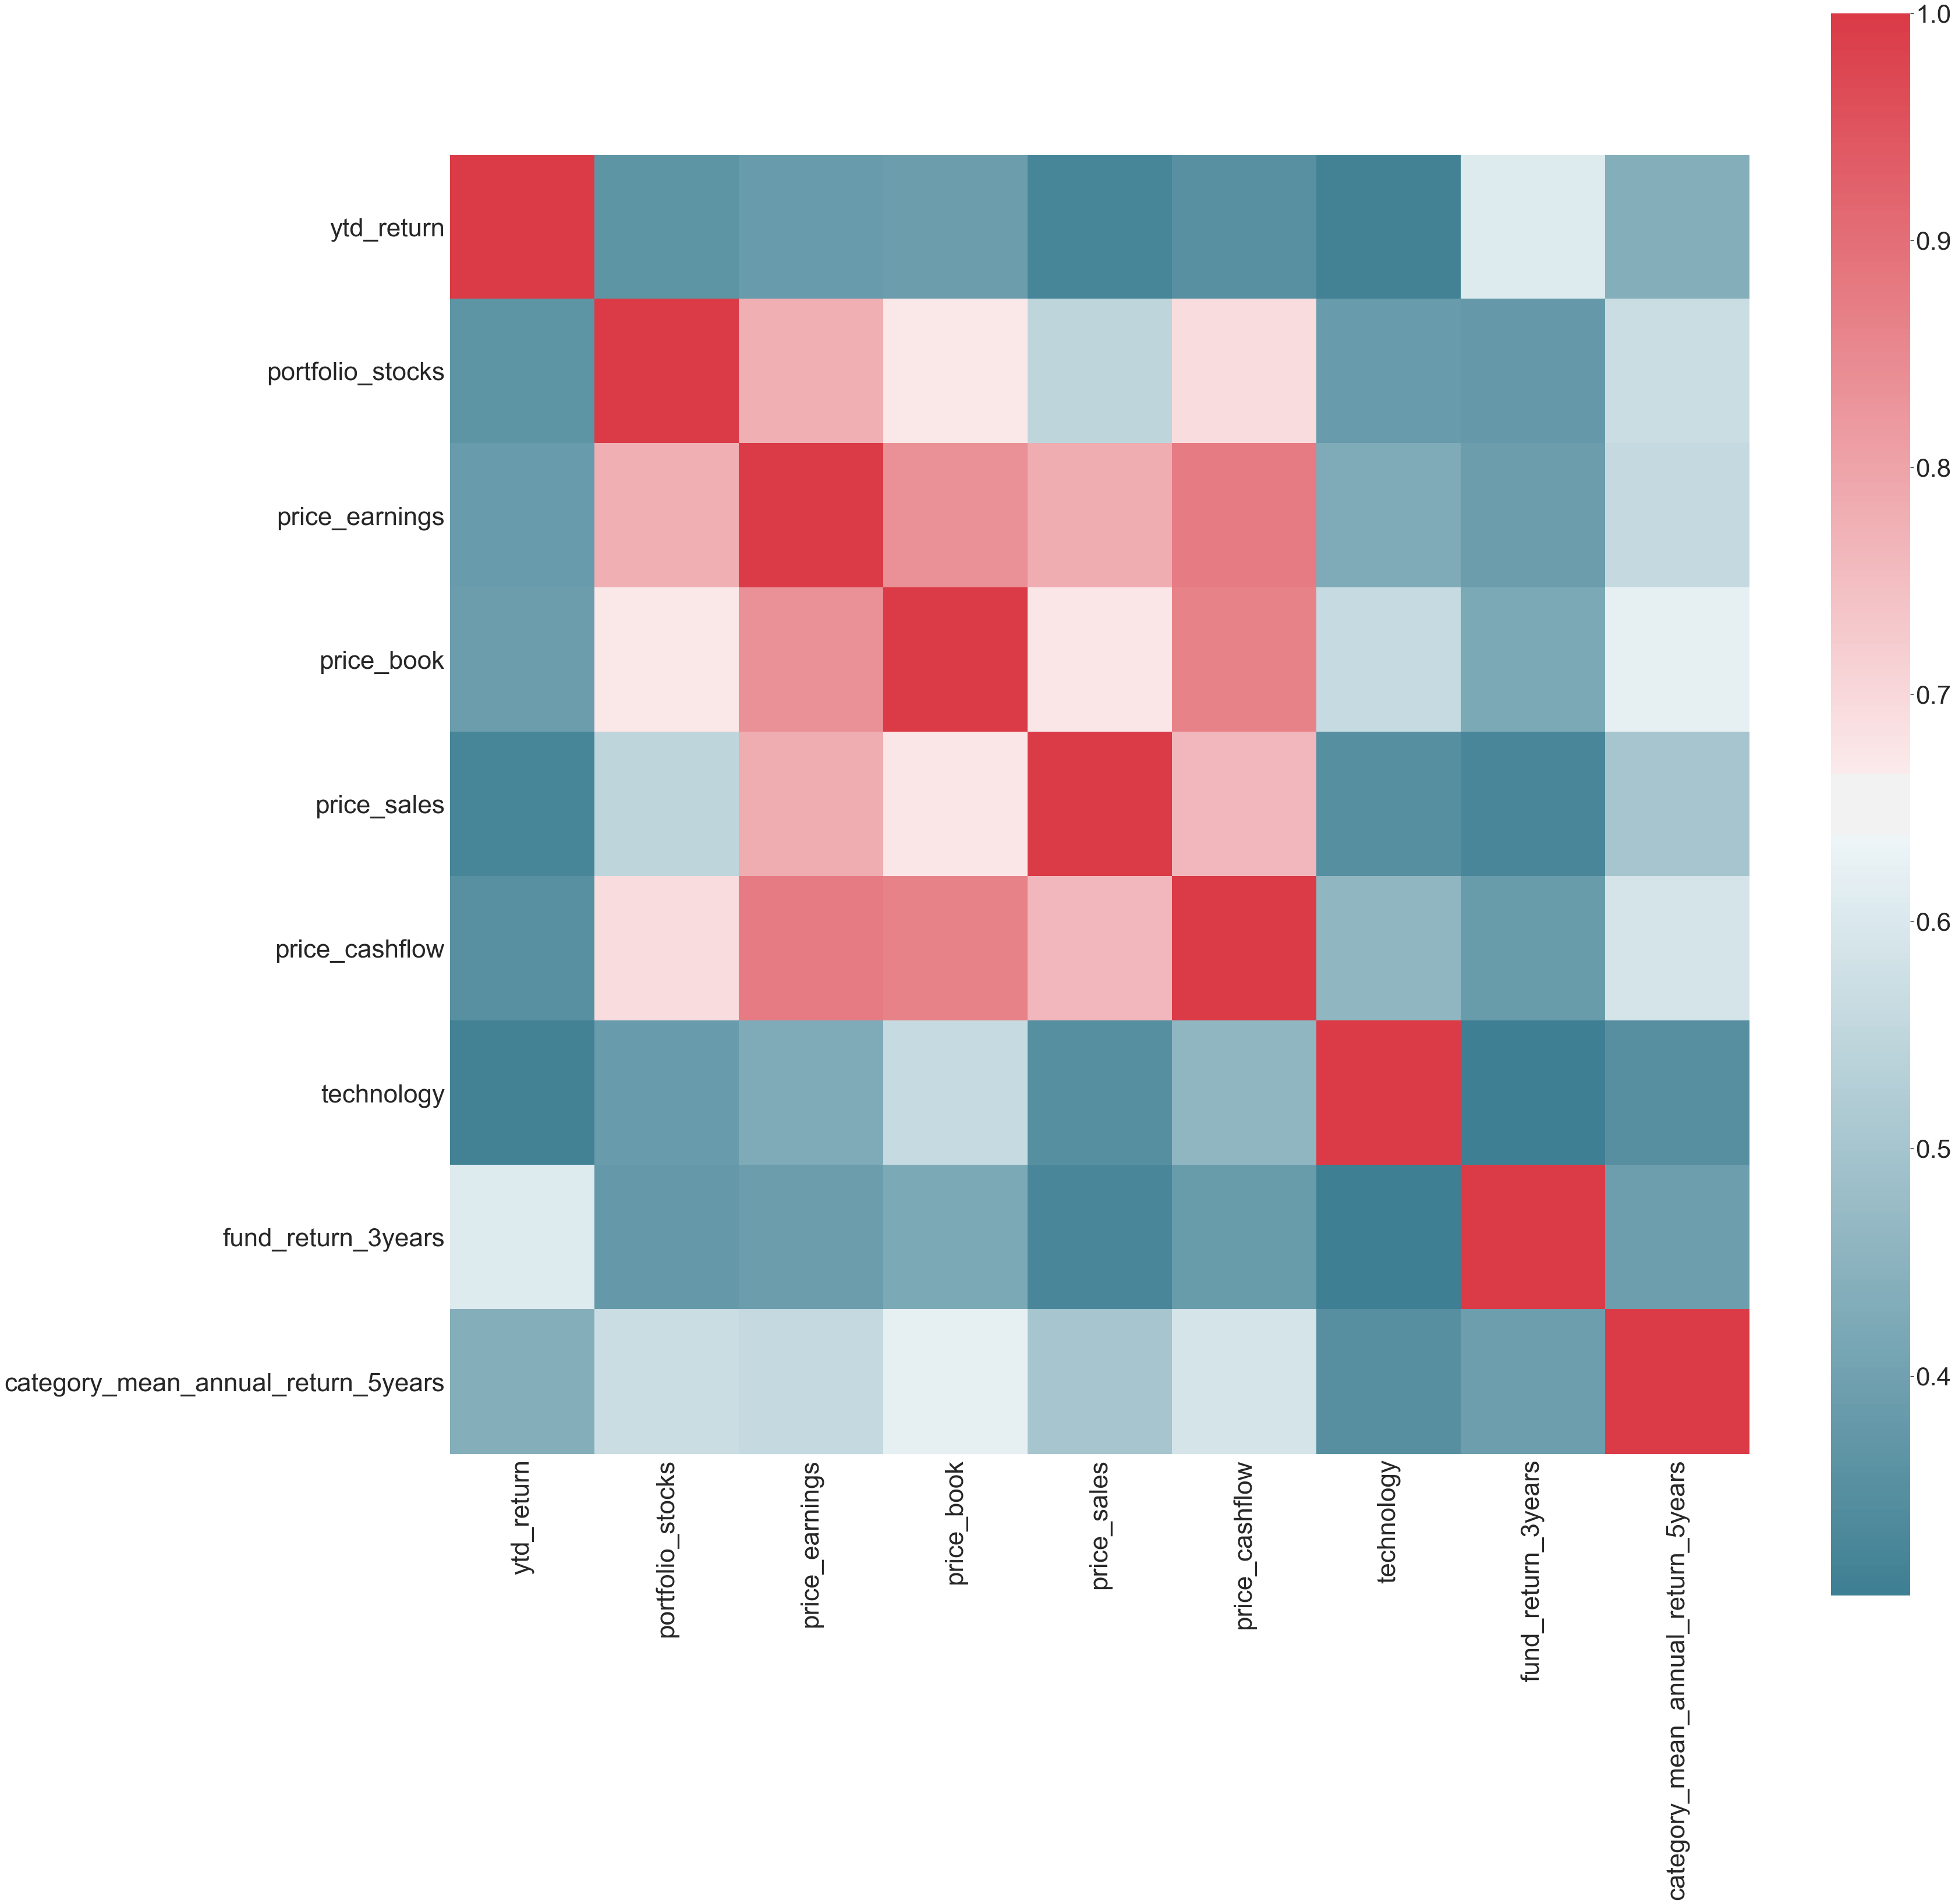

In [15]:
corr_mtx(df_etf, unique=False)

In [16]:
def scatter_mtx(df, figsize=50, cap=10):
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(figsize, figsize), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

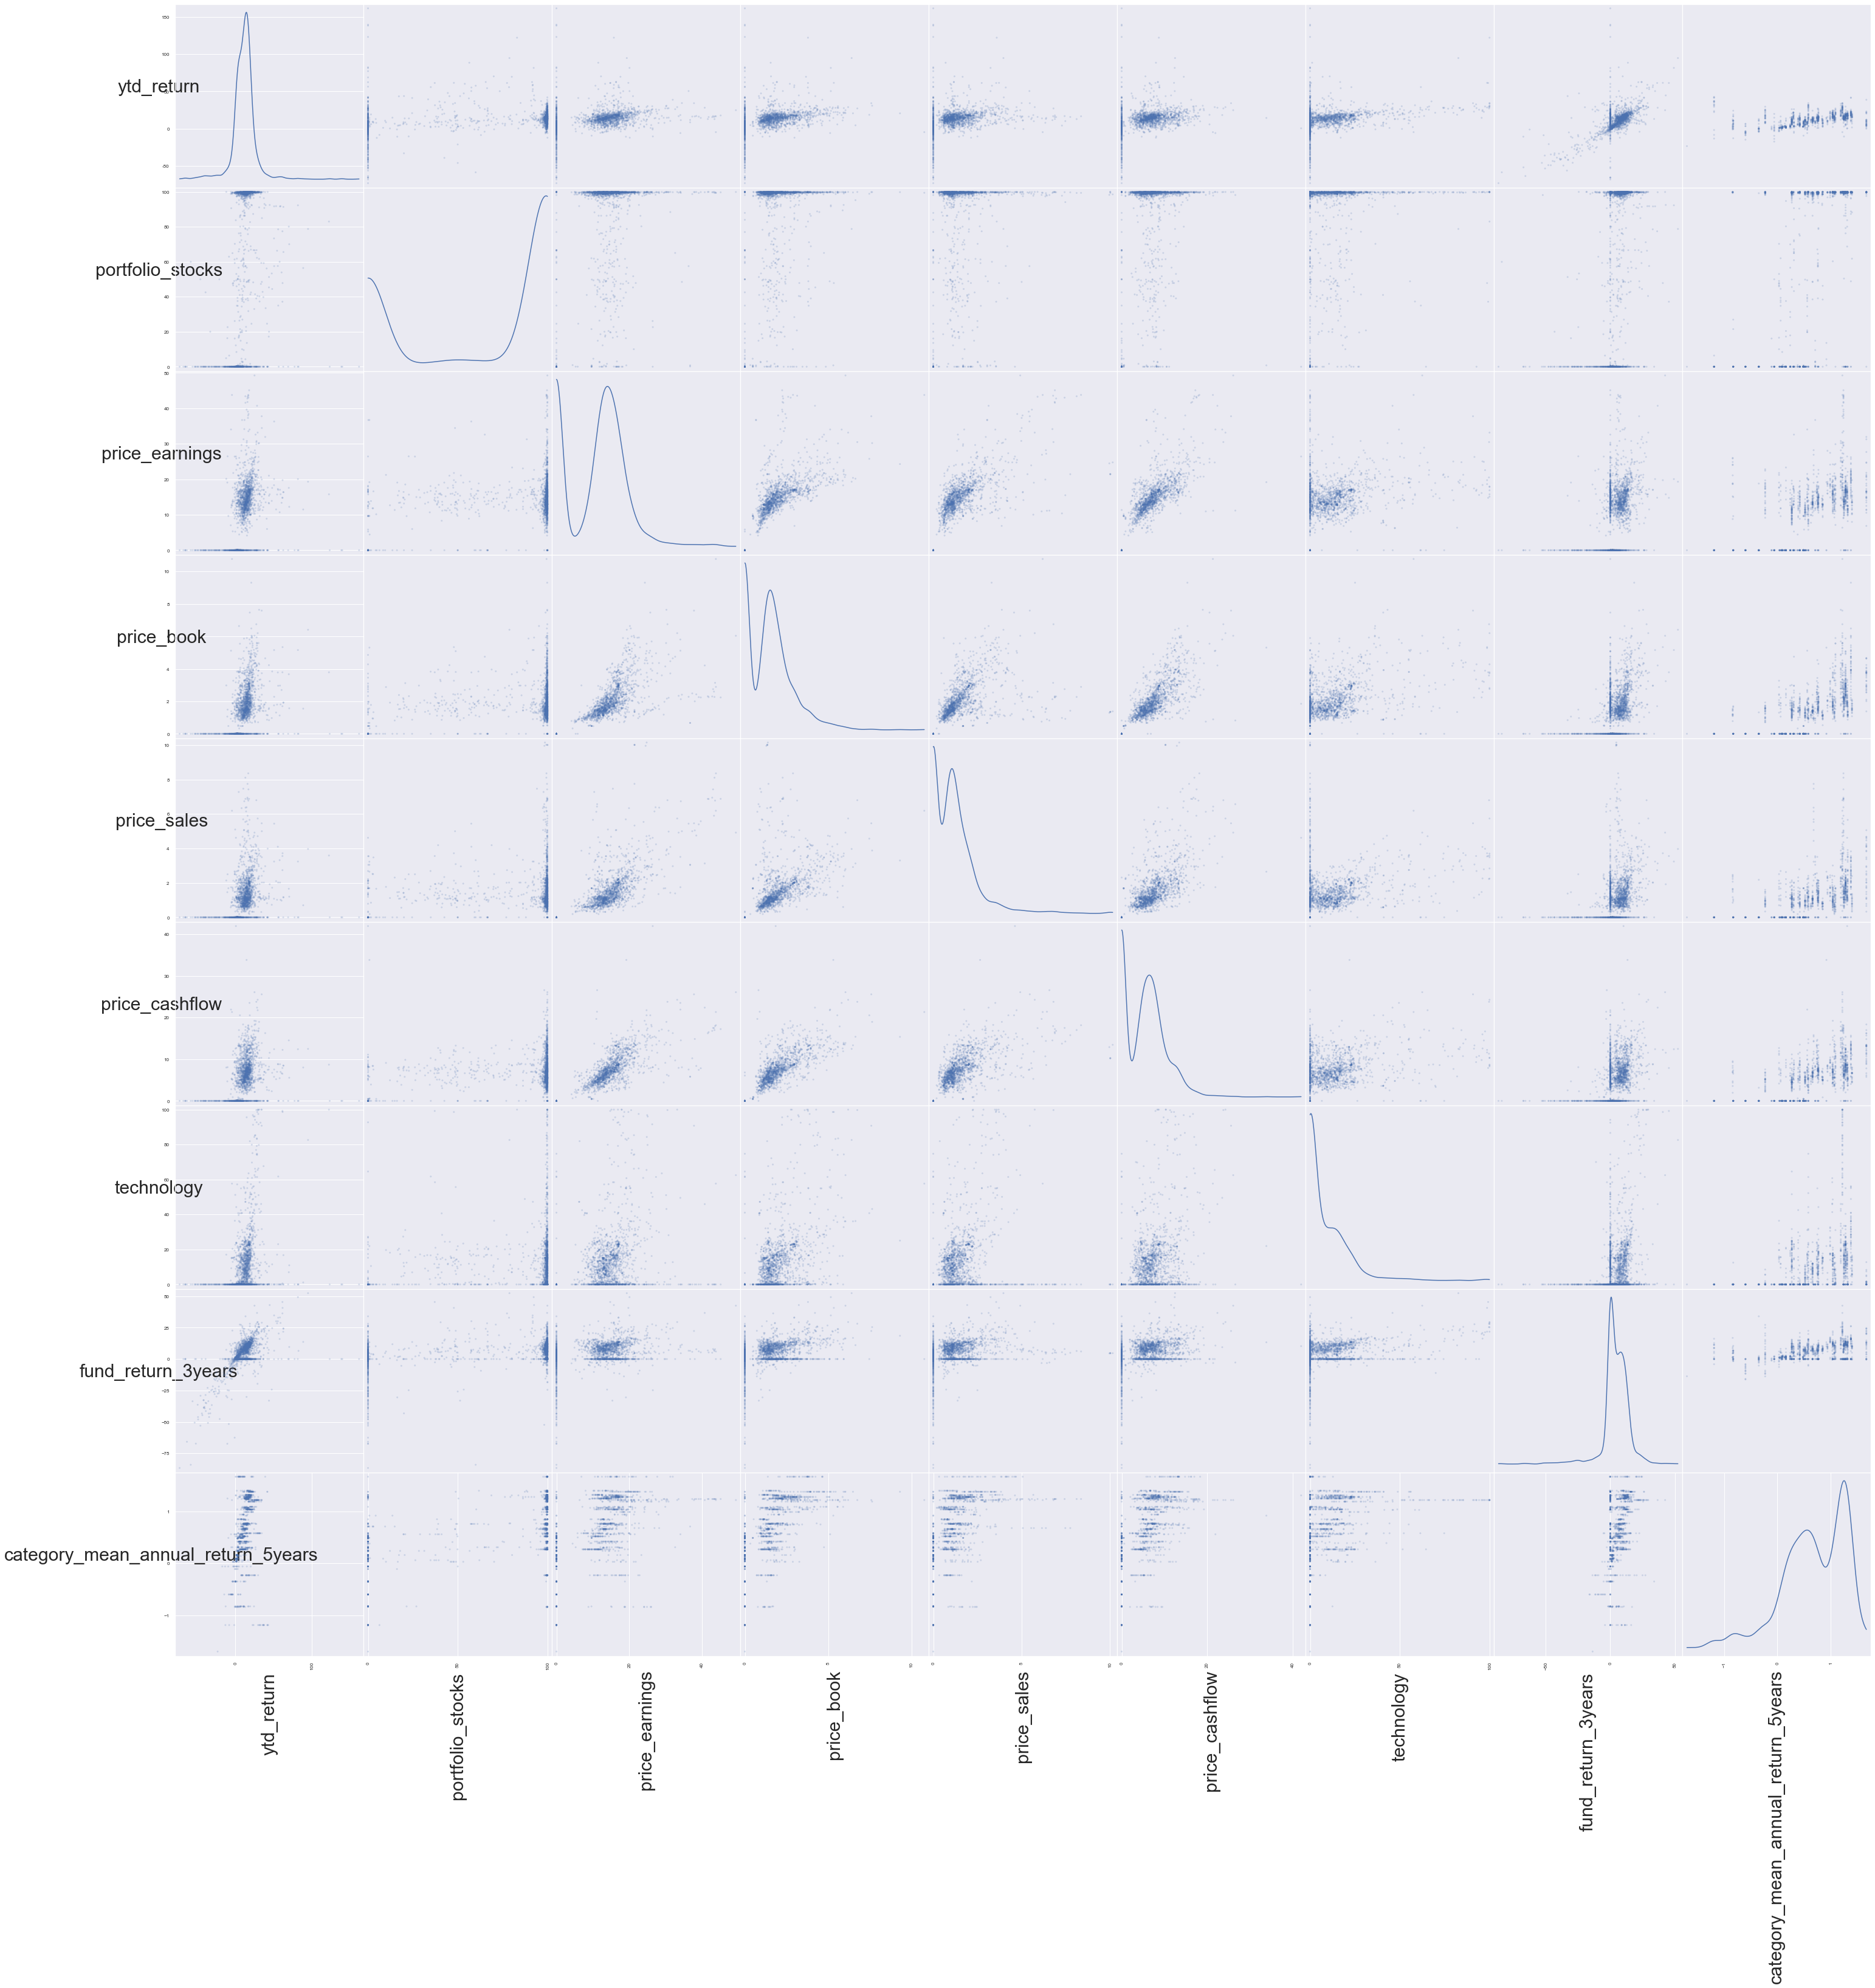

In [17]:
scatter_mtx(df_etf)

### MF Visualization

In [18]:
types(df_mf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Num morningstar_rating int64
Str inception_date object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_cash float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num portfolio_others float64
Num portfolio_preferred float64
Num portfolio_convertable float64
Str price_earnings object
Num price_book float64
Str price_sales object
Str price_cashflow object
Str median_market_cap object
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num bond_maturity float64
Num bond_durat

In [19]:
describe(df_mf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB
None

Columns summary:
fund_name
count     25308
unique    25308
top       MAWCX
freq          1
Name: fund_name, dtype: object
MAWCX    1
JEAMX    1
SDUSX    1
JDBRX    1
PREHX    1
        ..
TSMYX    1
SCETX    1
SSGMX    1
CAPOX    1
CFTAX    1
Name: fund_name, Length: 25308, dtype: int64

fund_extended_name
count                                                 25308
unique                                                25265
top       Northern Lights Fund Trust II - SFG Futures St...
freq                                                      4
Name: fund_extended_name, dtype: object
Northern Lights Fund Trust II - SFG Futures Strategy Fund                          4
Fidelity Income Fund - Fidelity Income Replacement 2016 Fund                       4
Calamos I

0.00      8148
100.00     109
13.38       73
15.63       53
16.79       50
          ... 
20.55        1
2.23         1
50.08        1
9.93         1
28.46        1
Name: financial_services, Length: 2287, dtype: int64

real_estate
count    25193.000000
mean         4.928513
std         13.863994
min          0.000000
25%          0.000000
50%          1.550000
75%          4.440000
max        100.000000
Name: real_estate, dtype: float64
0.00      10331
2.50         75
3.73         67
100.00       65
2.51         63
          ...  
12.07         1
17.30         1
16.51         1
95.53         1
16.01         1
Name: real_estate, Length: 1404, dtype: int64

consumer_defensive
count    25193.000000
mean         5.113315
std          6.098919
min          0.000000
25%          0.000000
50%          4.840000
75%          7.880000
max        100.000000
Name: consumer_defensive, dtype: float64
0.00     8952
7.76       79
7.95       77
7.67       71
7.56       69
         ... 
14.91       1
5.

 0.00     8574
 15.42      24
 15.14      24
 9.24       23
 13.11      21
          ... 
-2.53        1
-12.21       1
 27.51       1
 20.85       1
 19.81       1
Name: fund_return_10years, Length: 2280, dtype: int64

category_return_10years
count    25191.000000
mean         9.675278
std          4.932570
min        -24.990000
25%          6.440000
50%          9.970000
75%         14.120000
max         18.720000
Name: category_return_10years, dtype: float64
15.94    1345
14.54    1288
13.68    1132
4.56      970
11.79     951
         ... 
7.83       20
5.32       16
12.04      15
13.67      13
1.73        2
Name: category_return_10years, Length: 99, dtype: int64

fund_return_2018
count    24354.000000
mean        -6.687053
std          6.683230
min        -59.100000
25%        -10.520000
50%         -5.800000
75%         -1.620000
max         39.470000
Name: fund_return_2018, dtype: float64
 0.53     29
 0.14     29
-8.74     29
 0.31     29
-4.70     28
          ..
 7.19      1


1.00     575
1.06     488
1.01     446
1.04     408
1.02     387
        ... 
2.72       1
2.40       1
1.65       1
3.07       1
23.80      1
Name: fund_beta_10years, Length: 304, dtype: int64

category_beta_10years
count    25200.000000
mean         0.009071
std          0.005481
min         -0.020000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.120000
Name: category_beta_10years, dtype: float64
 0.01    21287
 0.00     3170
 0.02      635
-0.02       55
 0.12       28
 0.03       25
Name: category_beta_10years, dtype: int64

fund_mean_annual_return_3years
count    23639.000000
mean         0.636010
std          0.435884
min         -3.190000
25%          0.330000
50%          0.620000
75%          0.890000
max          2.980000
Name: fund_mean_annual_return_3years, dtype: float64
 0.14    269
 0.80    268
 0.63    257
 0.62    256
 0.17    254
        ... 
 2.03      1
-1.48      1
-1.26      1
-0.84      1
-2.34      1
Name: fund_mean_annual_retu

count     16622
unique     3167
top         7.7
freq         29
Name: fund_treynor_ratio_10years, dtype: object
7.7      29
14.92    25
7.42     23
13.42    23
12.37    22
         ..
18        1
7.52      1
25.04     1
17.77     1
22.72     1
Name: fund_treynor_ratio_10years, Length: 3167, dtype: int64

category_treynor_ratio_10years
count    25200.000000
mean         0.138881
std          0.442711
min         -0.190000
25%          0.070000
50%          0.100000
75%          0.140000
max          4.680000
Name: category_treynor_ratio_10years, dtype: float64
 0.14    4489
 0.08    3856
 0.04    2120
 0.09    1658
 0.15    1458
 0.10    1390
 0.13    1364
 0.05    1358
 0.12    1254
 0.11     977
 0.07     751
 0.23     685
 0.06     448
 0.00     417
 0.02     386
 0.21     379
 0.03     345
-0.02     328
-0.05     283
 4.68     233
 0.19     231
-0.14     195
 0.18     163
-0.10     144
 0.16     105
 0.17      57
-0.19      51
 0.30      50
 0.01      25
Name: category_treynor_ratio

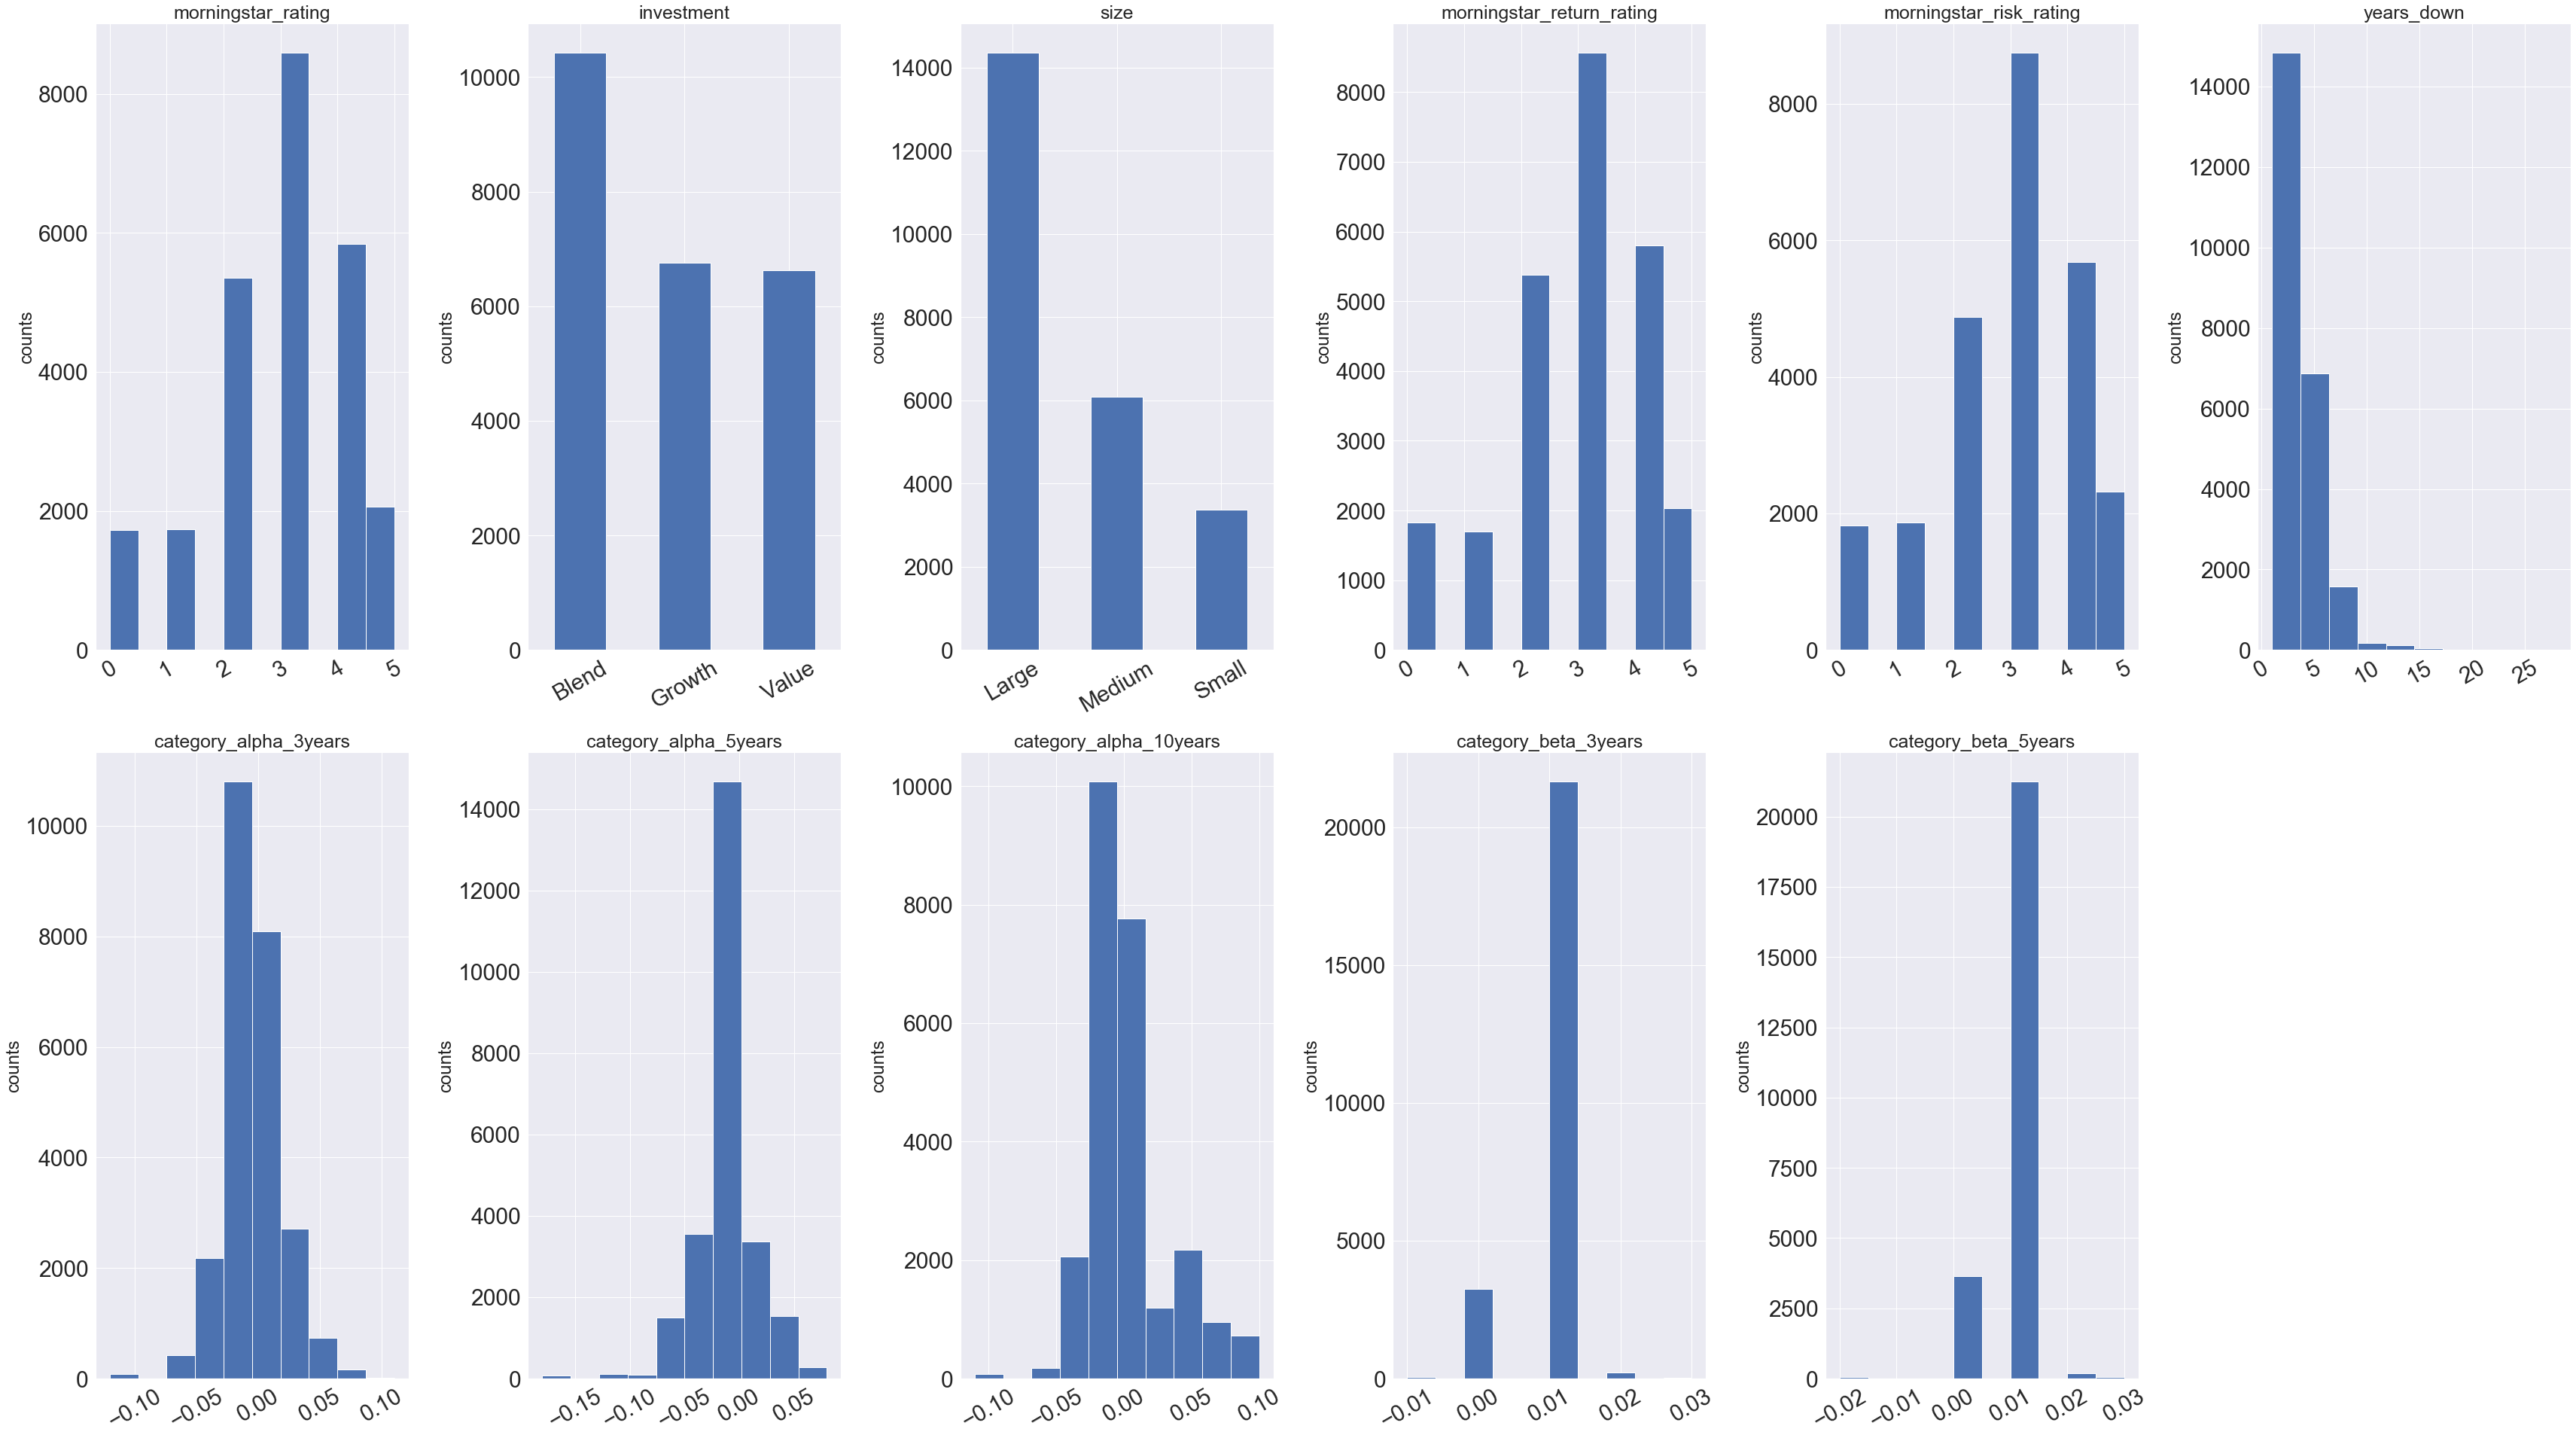

In [20]:
hist_bar_plot(df_mf)

In [21]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

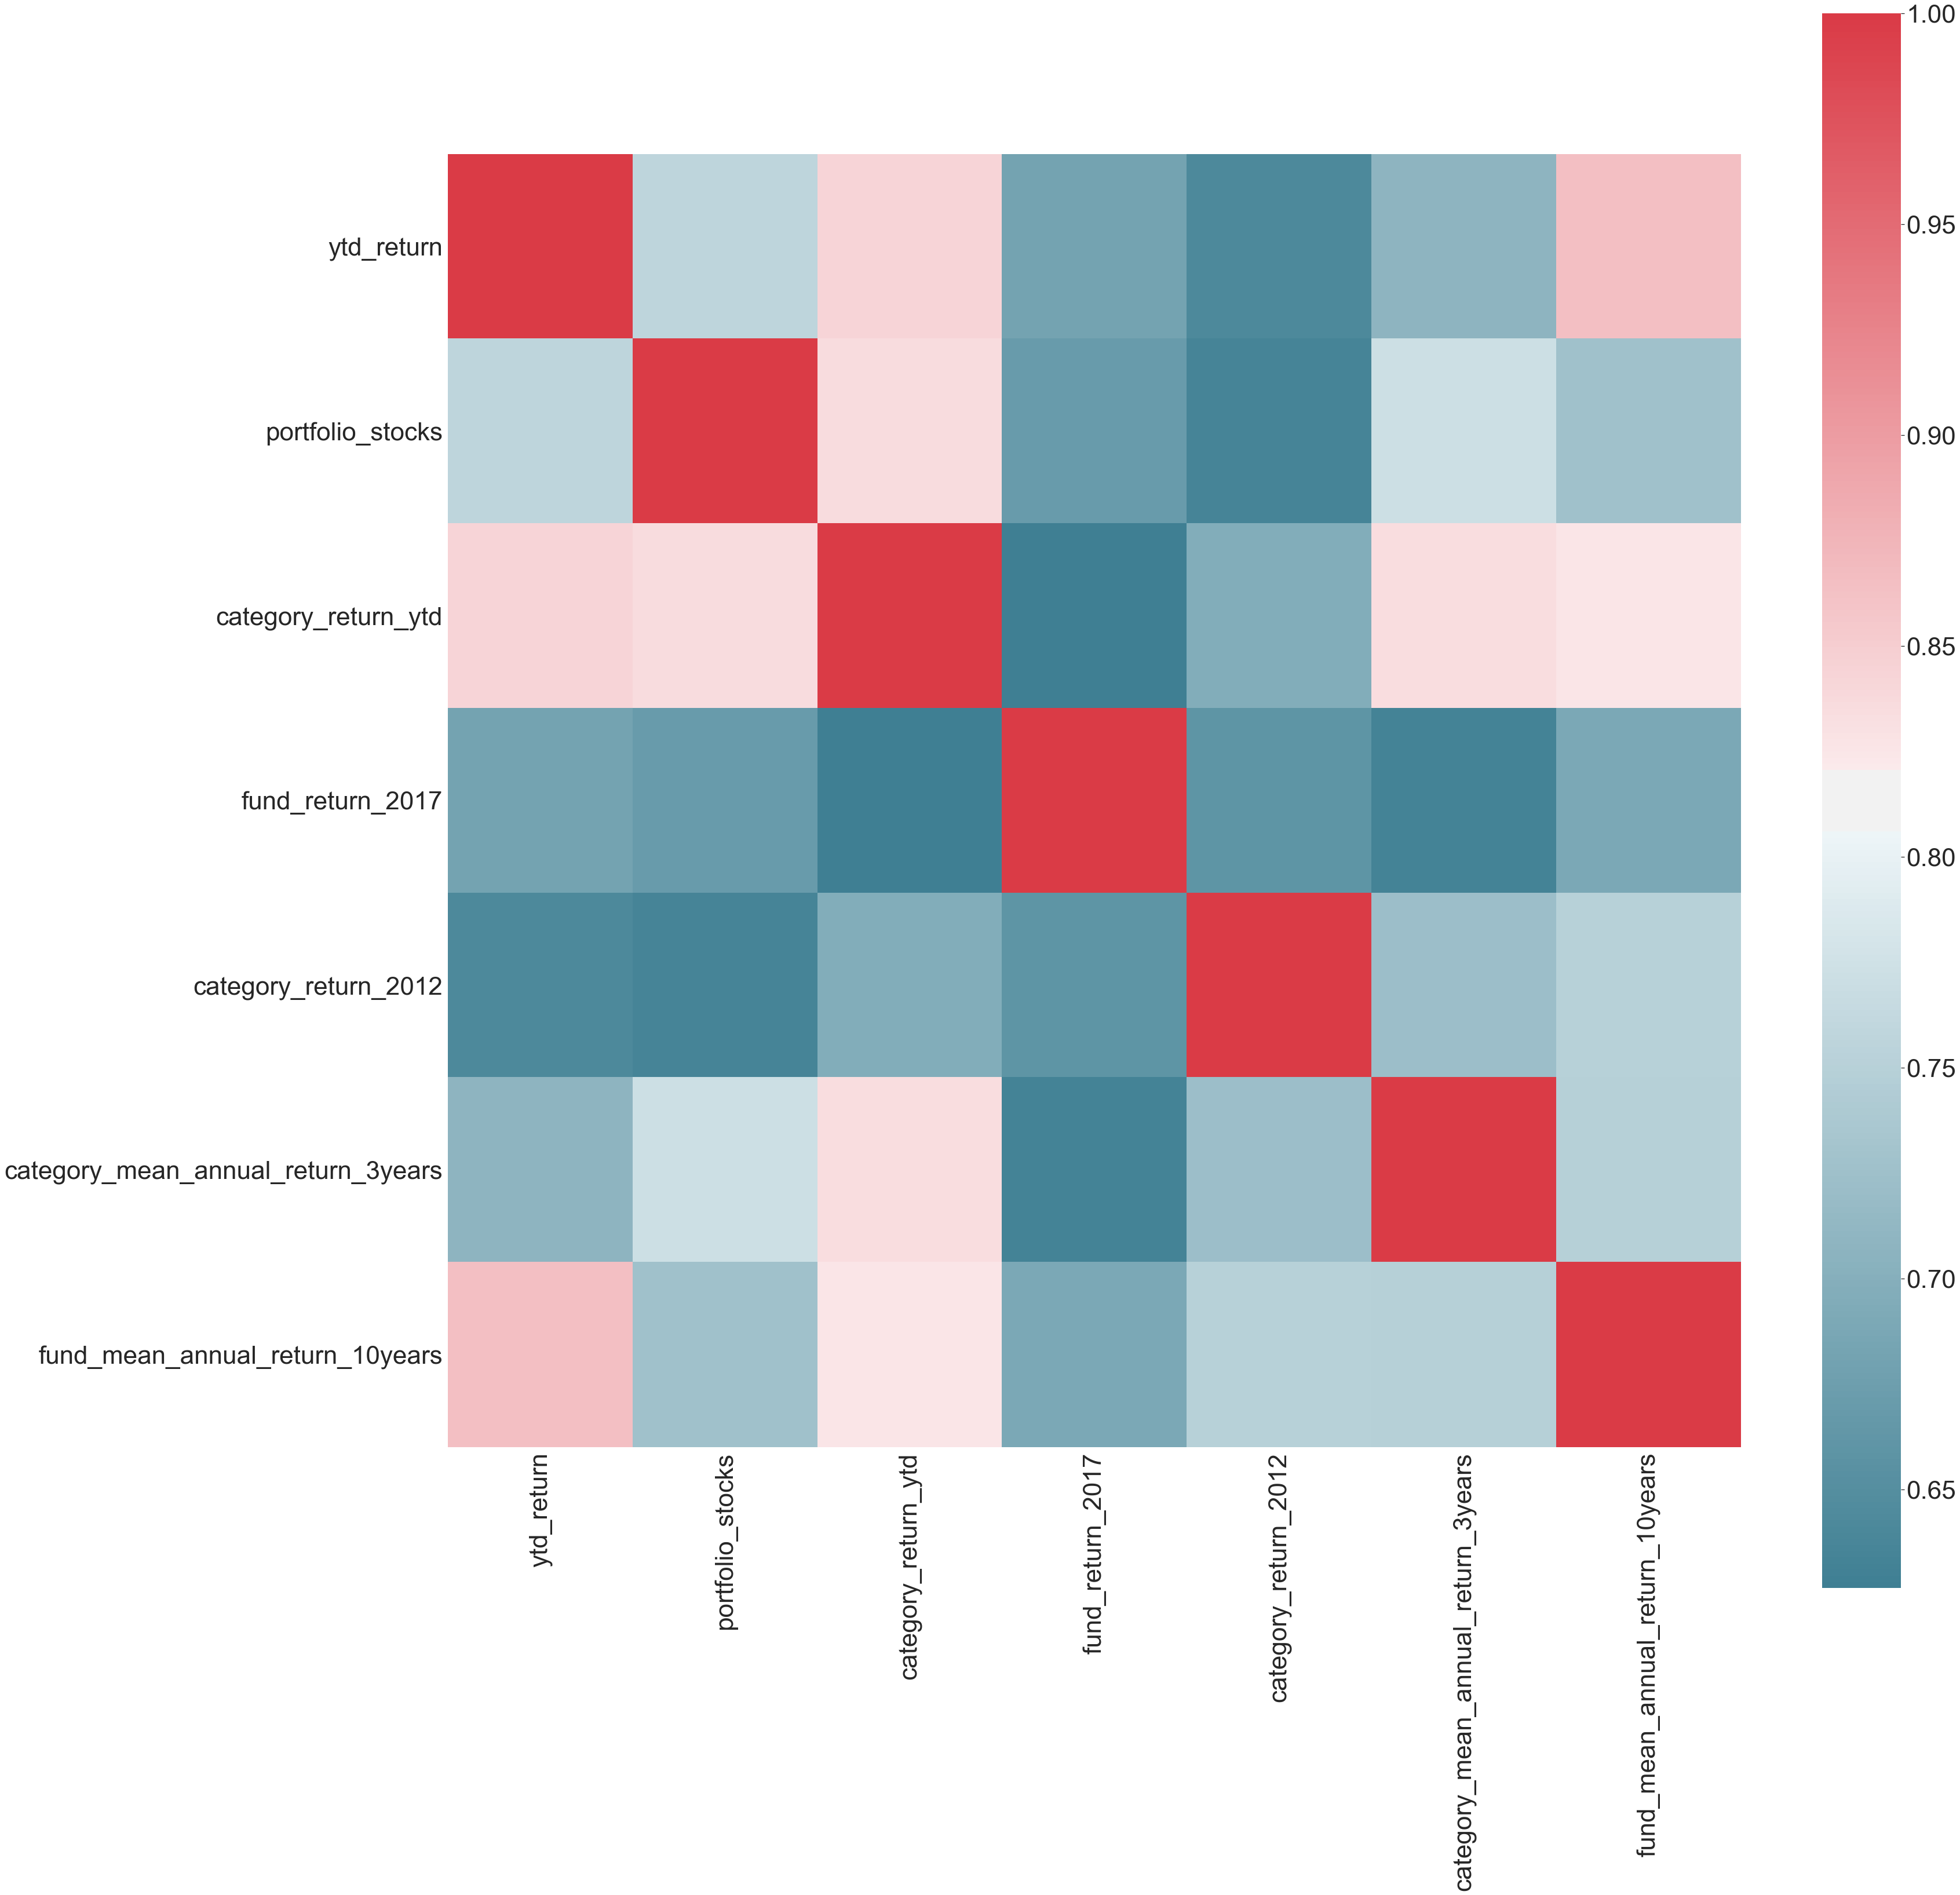

In [22]:
corr_mtx(df_mf, unique=False)

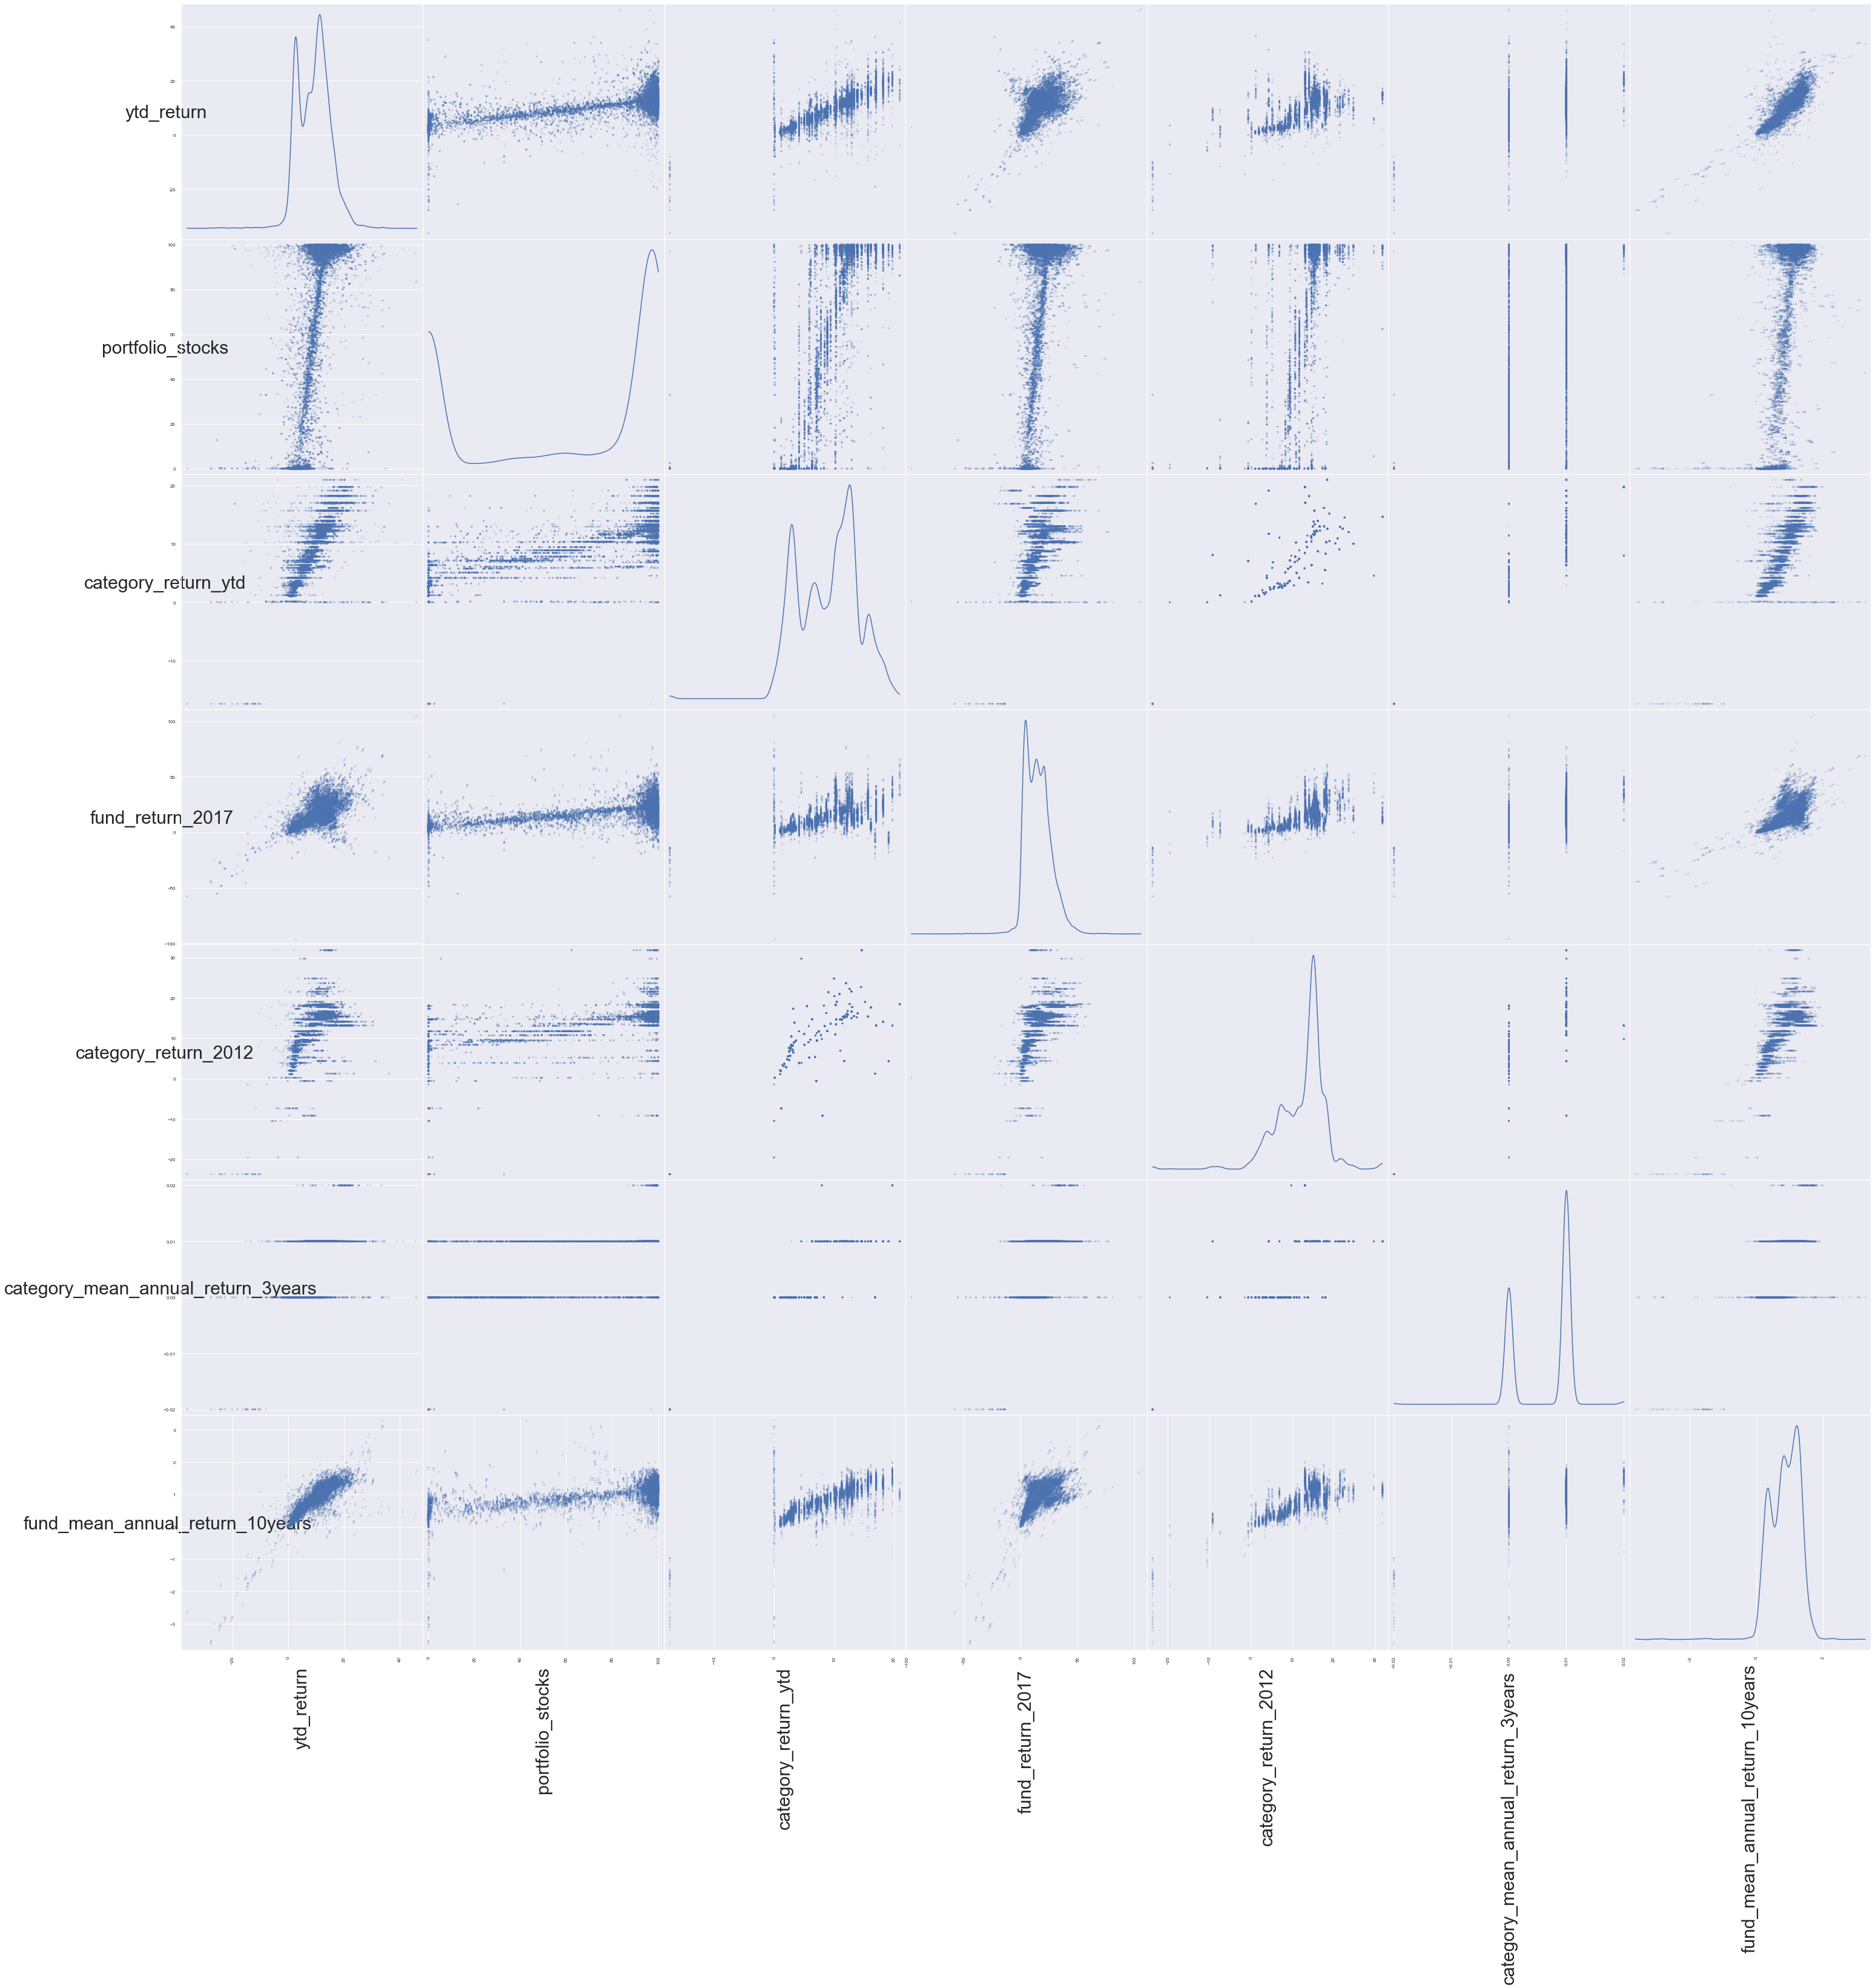

In [23]:
scatter_mtx(df_mf, cap=20)

### Dataset Cleaning

In [24]:
df_etf, df_mf = load_dataset() # Load again because of 'correlation_clean' function

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [25]:
def gaussian_clean(df, dataset_type):
    """

    :param df:
    :param dataset_type: etf or mf.
    :return:
    """
    # Fix NaN
    df.replace('', 'NaN', inplace=True)
    df.replace('nan', 'NaN', inplace=True)
    df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
    ]
    if dataset_type == 'etf':
        migrate_columns += [
            'category_treynor_ratio_5years',
        ]
    elif dataset_type == 'mf':
        migrate_columns += [
            'price_cashflow',
            'price_sales',
            'price_earnings',
            'median_market_cap',
            'fund_treynor_ratio_5years',
            'fund_treynor_ratio_10years',
        ]

    # Join together numerical columns
    num_mean = df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean.join(df[col])

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
    ]
    if dataset_type == 'etf':
        low_info_categorical_columns += [
            'legal_type',
        ]
    elif dataset_type == 'mf':
        low_info_categorical_columns += [
            'inception_date',
        ]

    # Join together categorical (without low-value) columns
    migrate_columns += low_info_categorical_columns
    str_mean = df[df.columns.difference(num_mean.columns)]
    for col in migrate_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns=unique)
        df = df.drop(col, axis=1)
        df = df.join(enc_df)

    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        df[col] = stack.values

    # Clean
    df_dropped = pd.DataFrame()
    for col in low_info_categorical_columns:
        df_dropped[col] = df[col].copy()
        df = df.drop(col, axis=1)

    return df, df_dropped

In [26]:
df_etf, df_etf_dropped = gaussian_clean(df_etf, 'etf')
   

C:\Users\NVukobrat\anaconda3\lib\site-packages\ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
   
df_mf, df_mf_dropped = gaussian_clean(df_mf, 'mf')

C:\Users\NVukobrat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\NVukobrat\anaconda3\lib\site-packages\ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Visualize after cleaning

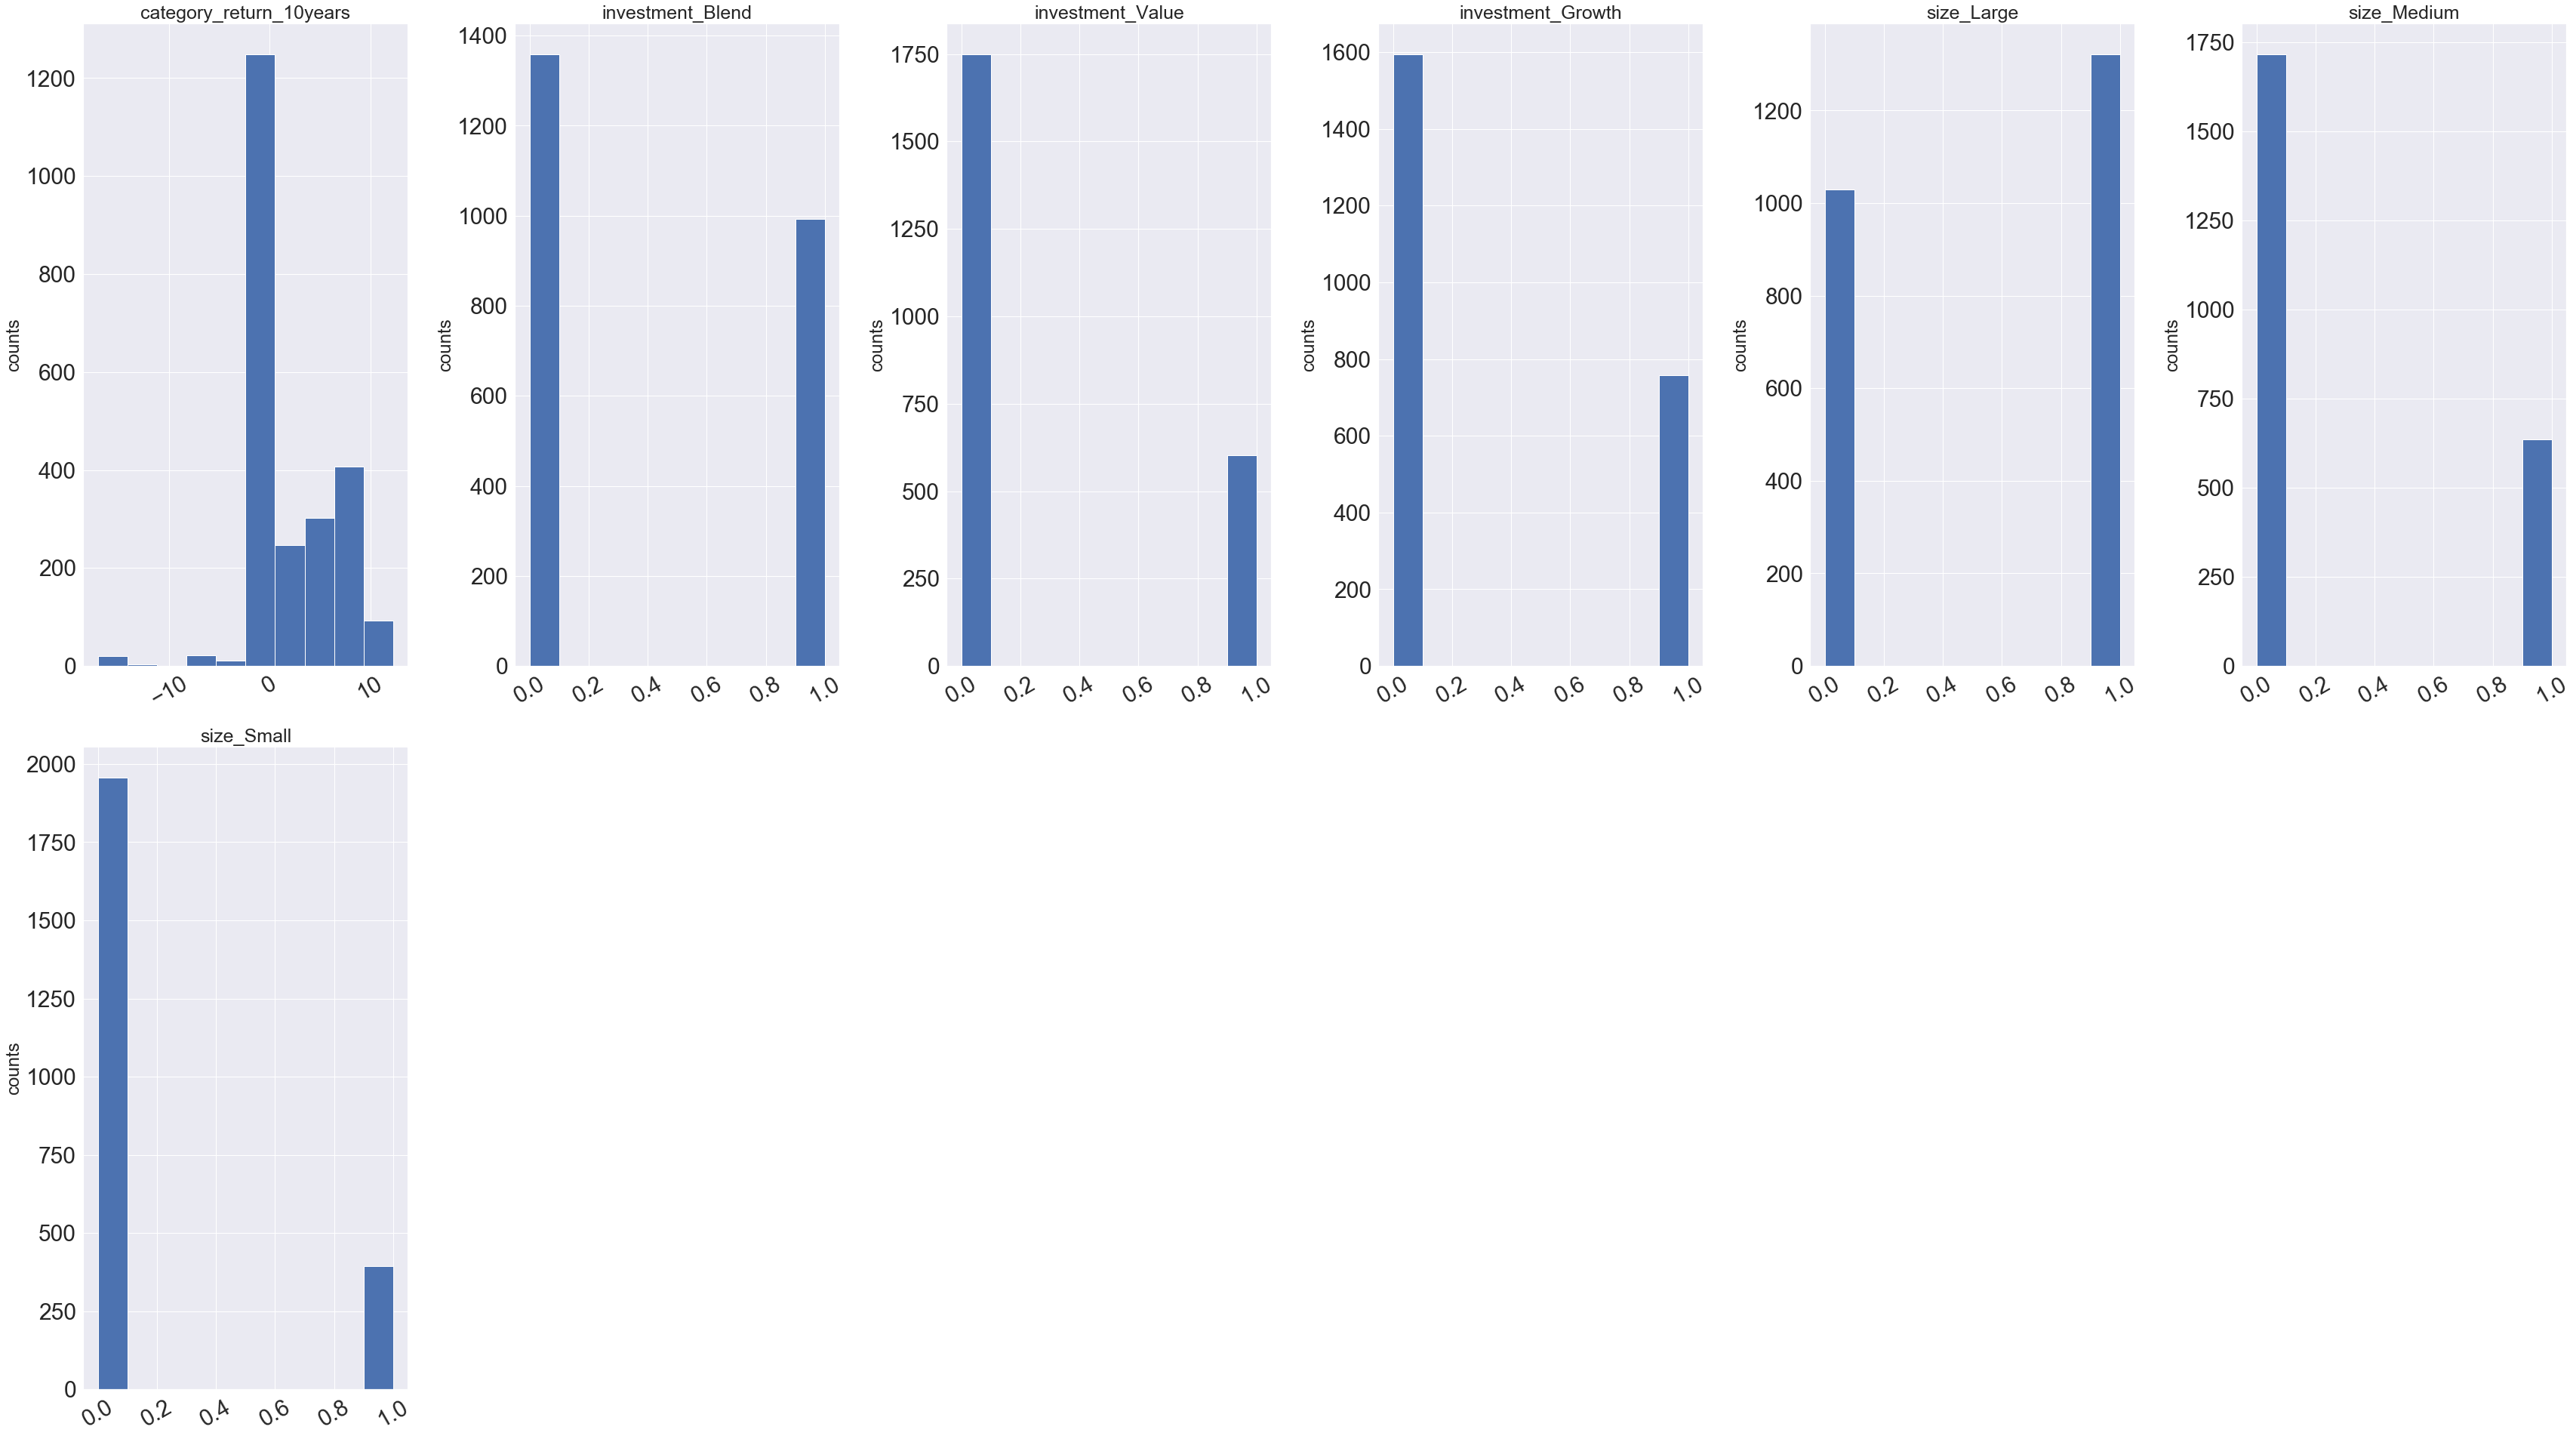

In [28]:
hist_bar_plot(df_etf)

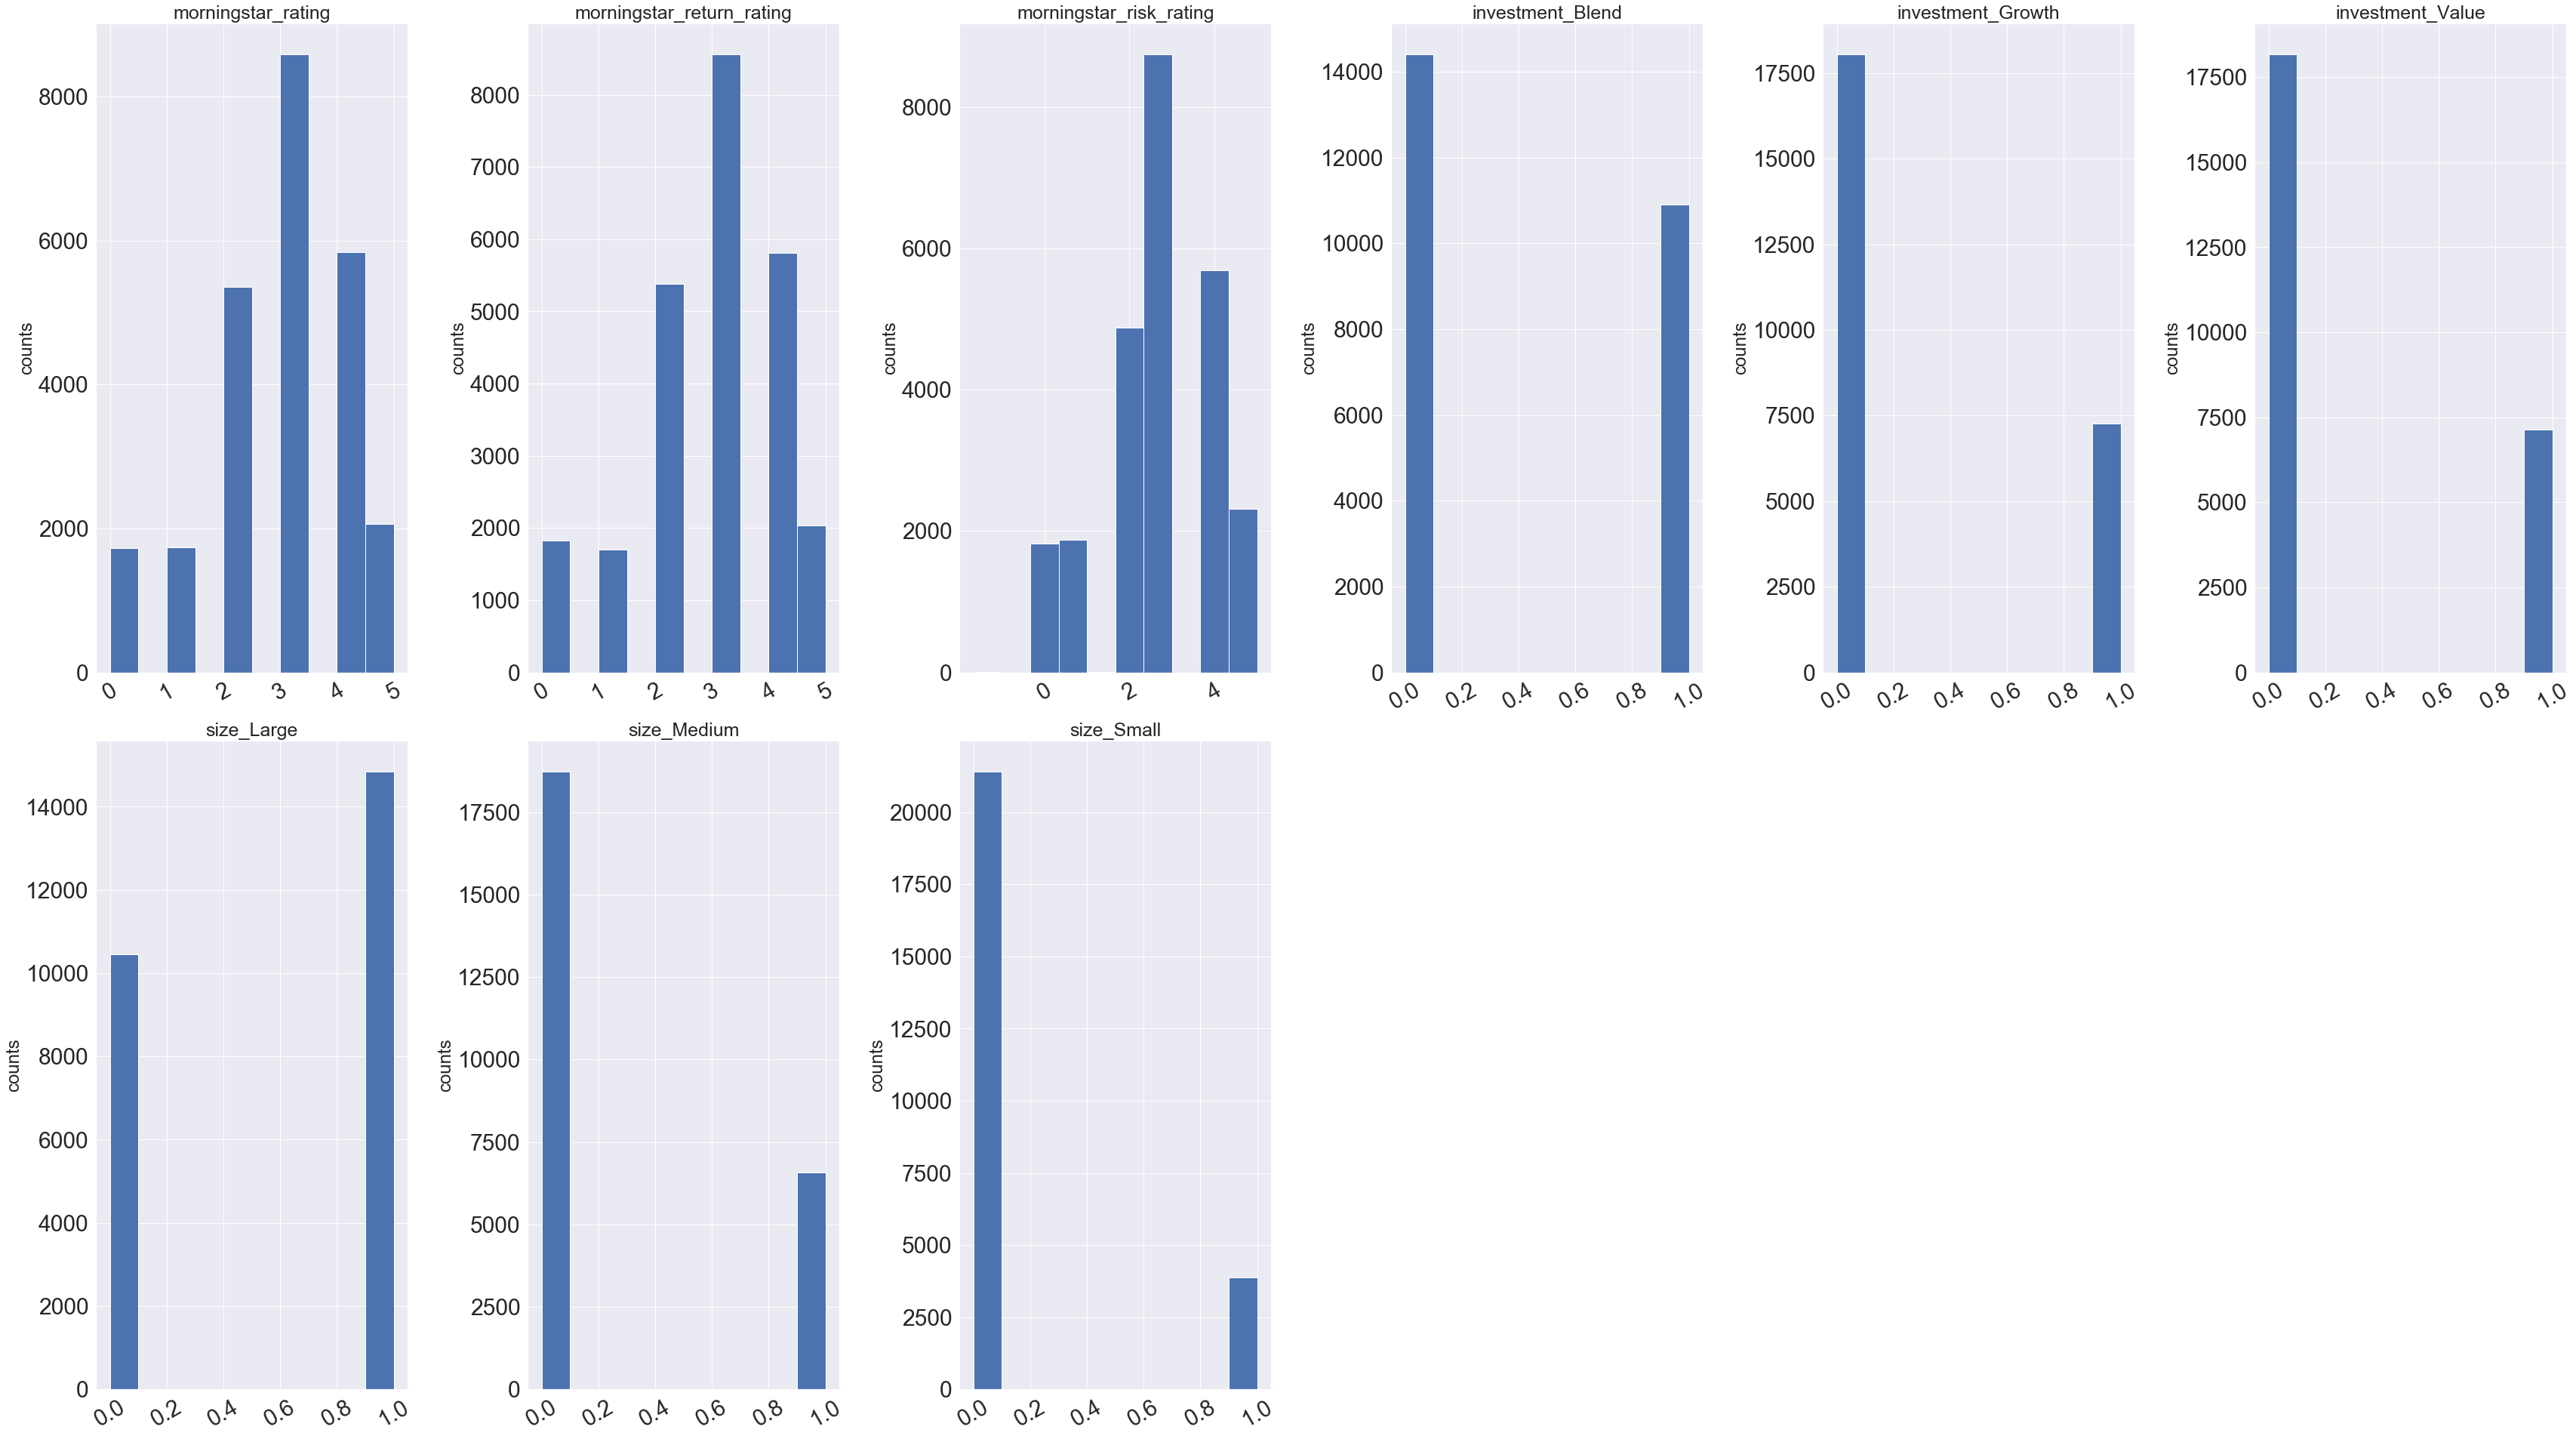

In [29]:
hist_bar_plot(df_mf)

### Continue